In [1]:
import pickle
import scipy.io as scio
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from datetime import datetime
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [2]:
path_cellResp = '../data/data_raw_pickled/subject_6_CellRespZ.pickle'
path_mat = '../data/data_raw_pickled/subject_6_mat_dict.pickle'
with open(path_cellResp, "rb") as input_file:
    cellResp = pickle.load(input_file)
with open(path_mat, "rb") as input_file:
    xyz = pickle.load(input_file)['cell_XYZ']

In [3]:
pca_model = PCA(n_components=20, random_state=10)
print('Beginning fit: ',datetime.now().time())
pca_model.fit(cellResp)
print('Fitted: ',datetime.now().time())

Beginning fit:  16:49:01.986057
Fitted:  16:50:38.099942


In [4]:
sum(pca_model.explained_variance_ratio_)

0.1945889204550869

In [5]:
def scatter3d(x,y,z, cs=np.array([]), colorsMap='Greys'):
    fig = plt.figure(figsize=(20, 5))
    if cs.size > 0:
        cm = plt.get_cmap(colorsMap)
        cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        scalarMap.set_array(cs)
        fig.colorbar(scalarMap)
        color = scalarMap.to_rgba(cs)
    else:
        color = 'black'
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=color, s=.1)
    ax.set_xlim3d(0,2000)
    ax.set_ylim3d(0,1500)
    ax.set_zlim3d(0,250)
    ax.view_init(elev=70, azim=135)
    plt.show()

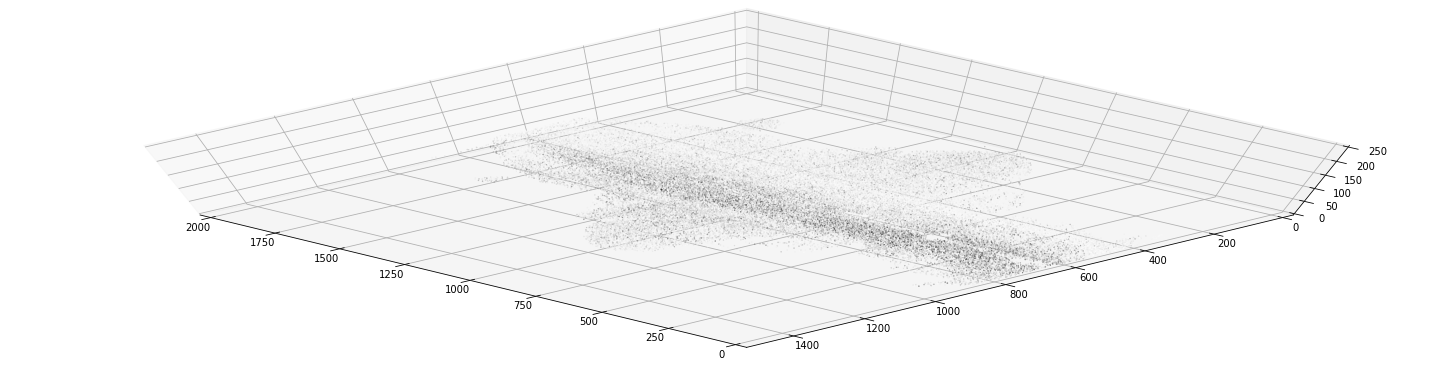

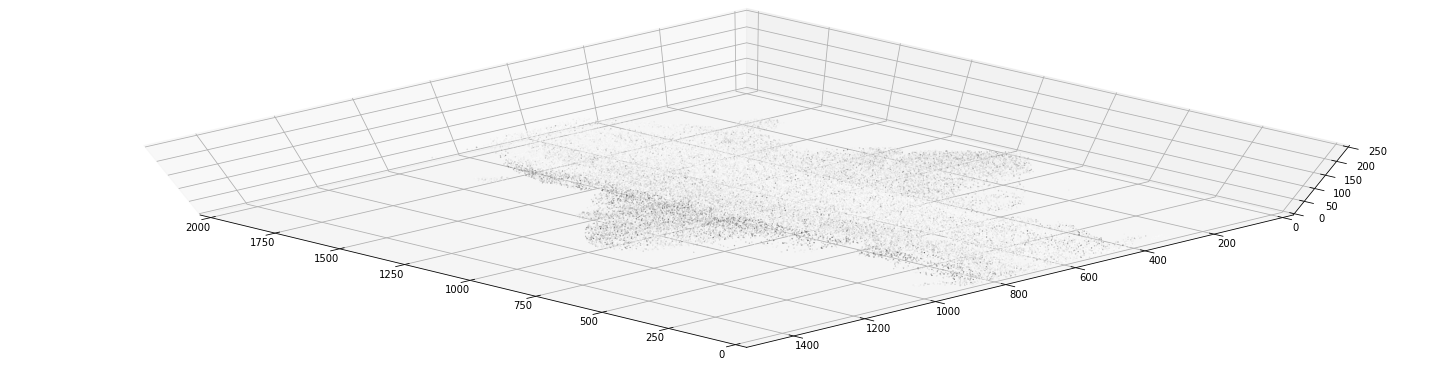

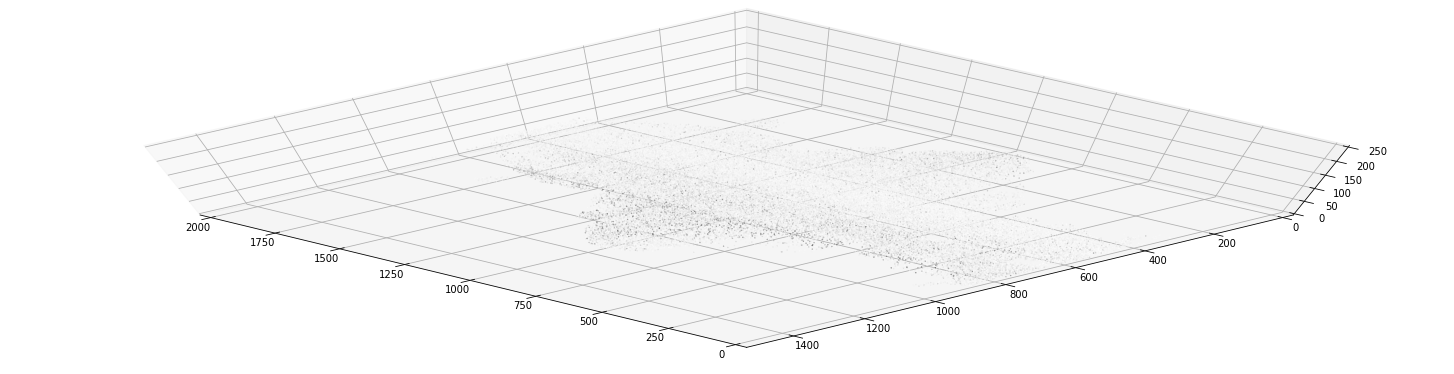

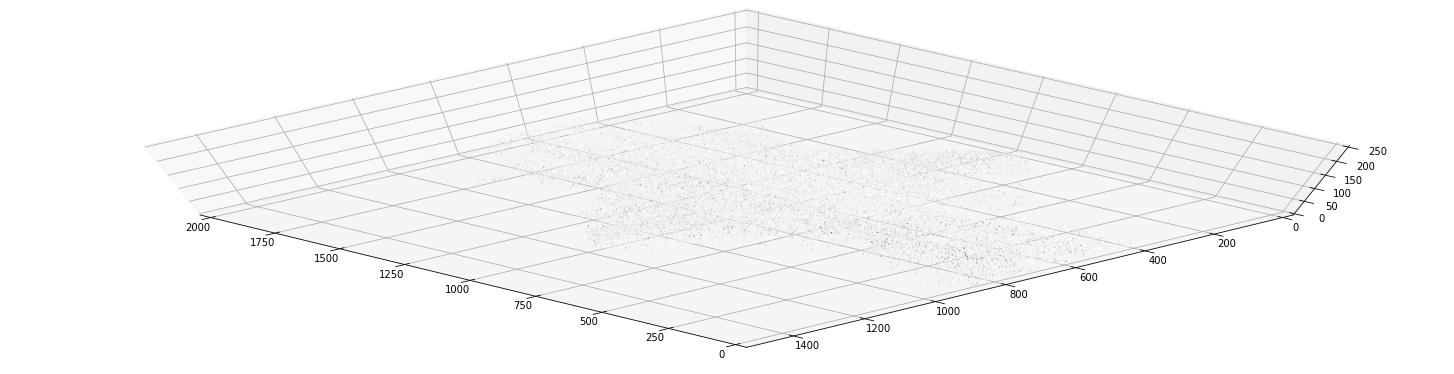

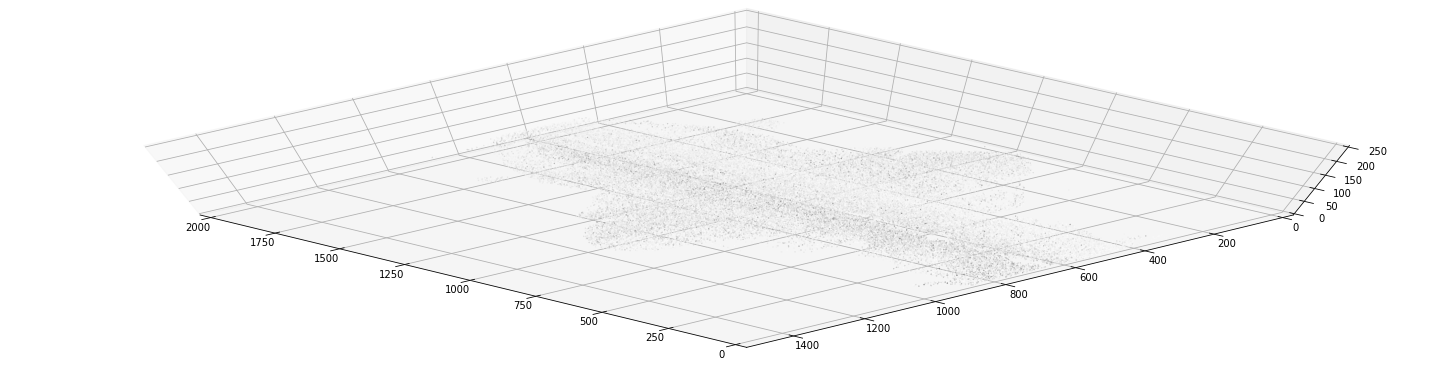

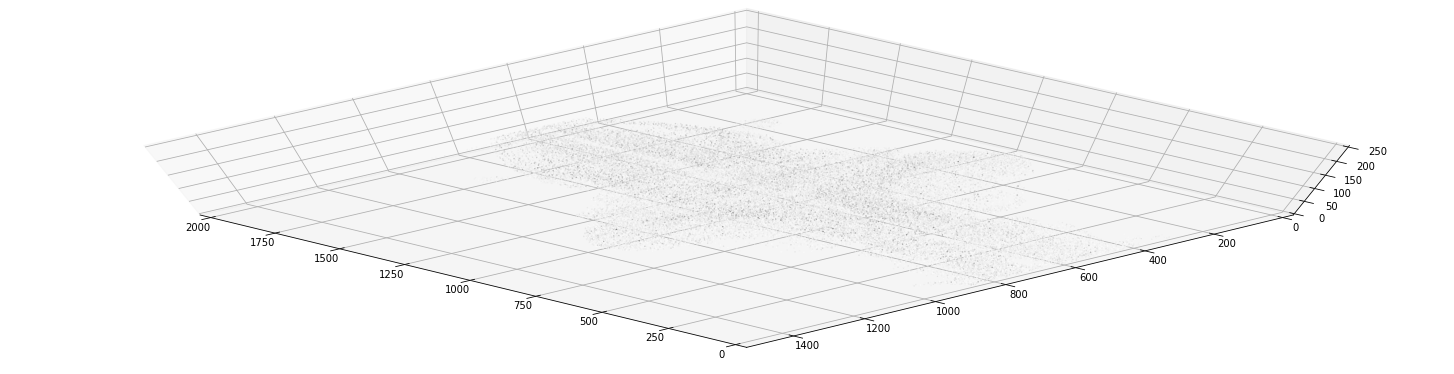

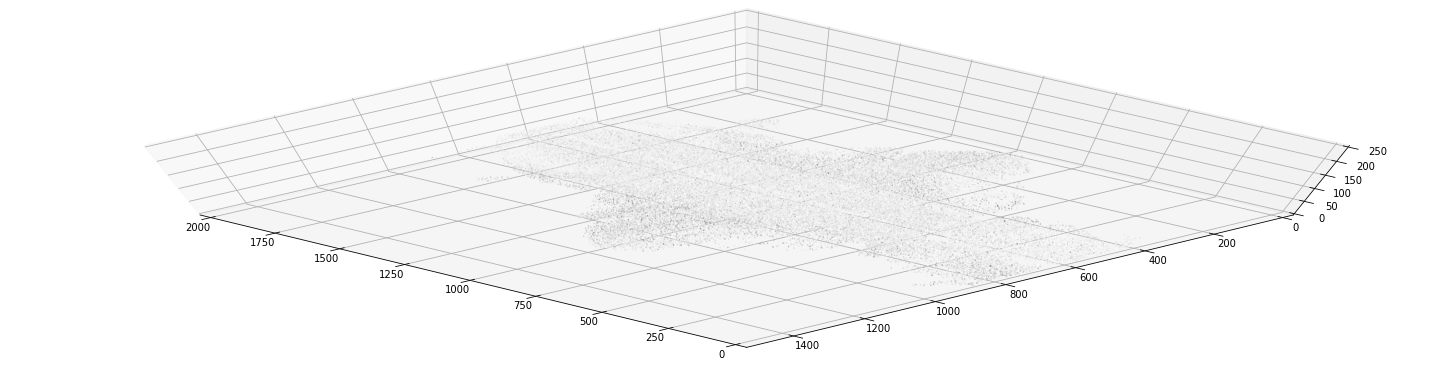

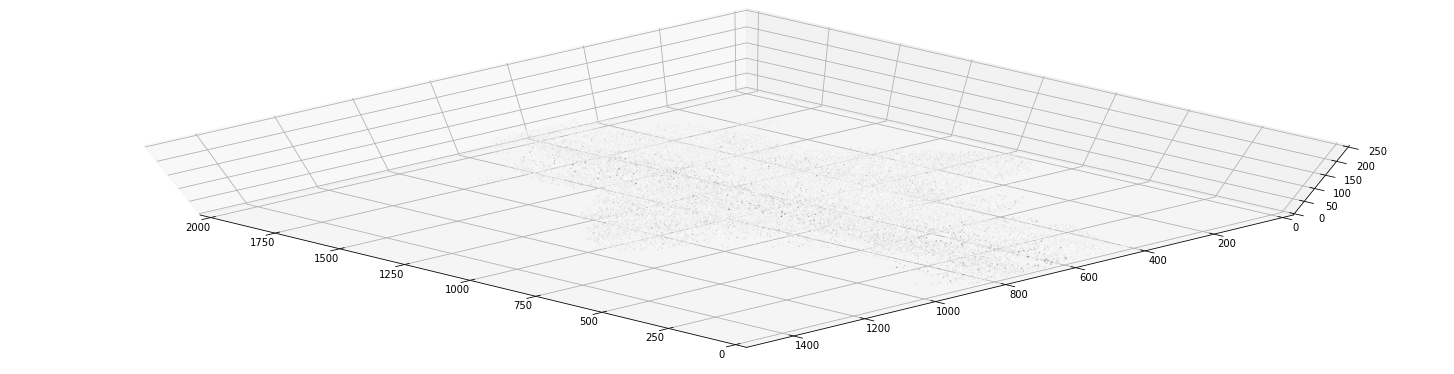

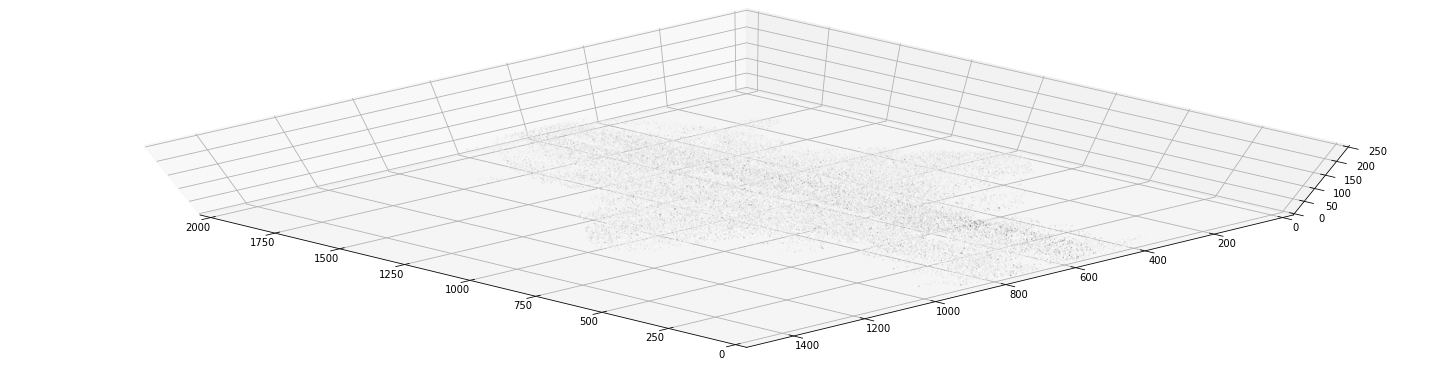

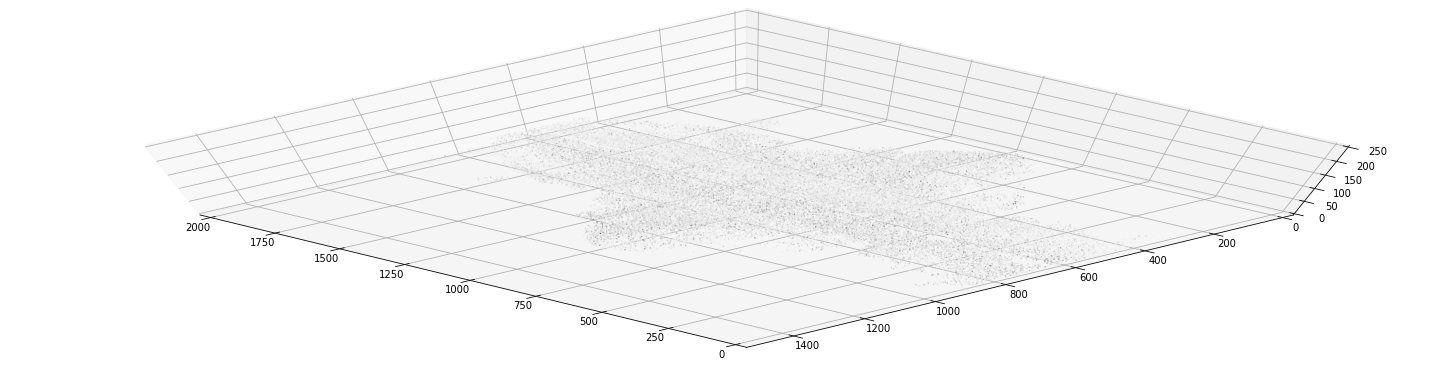

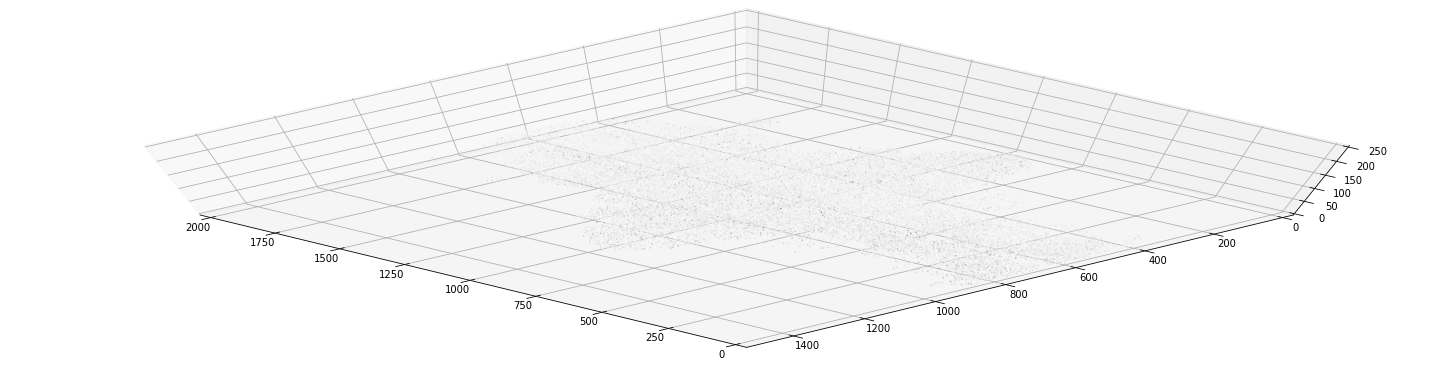

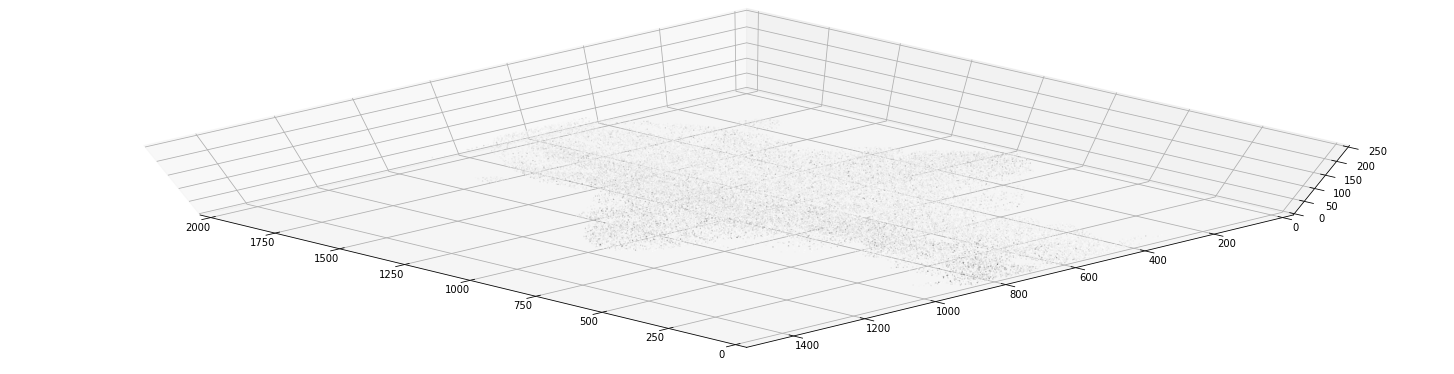

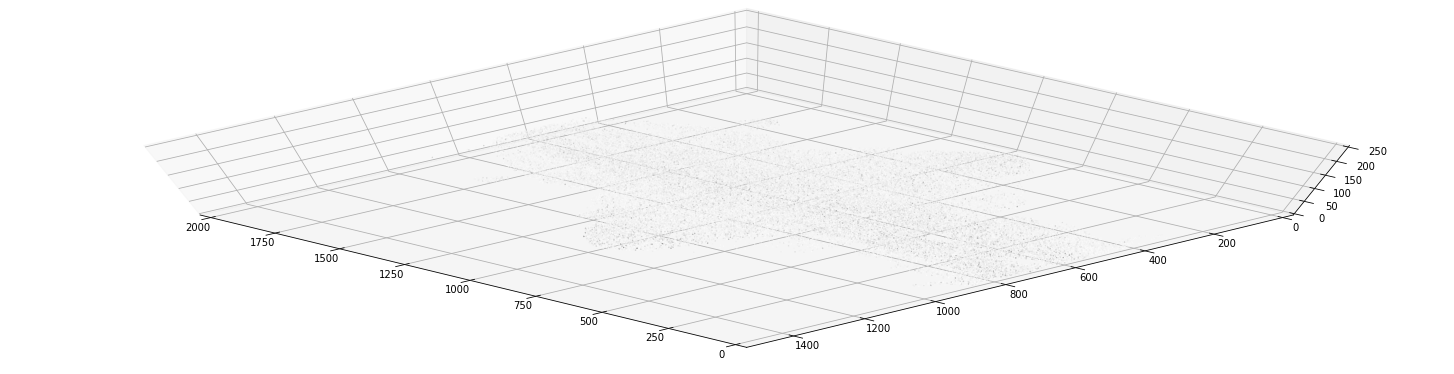

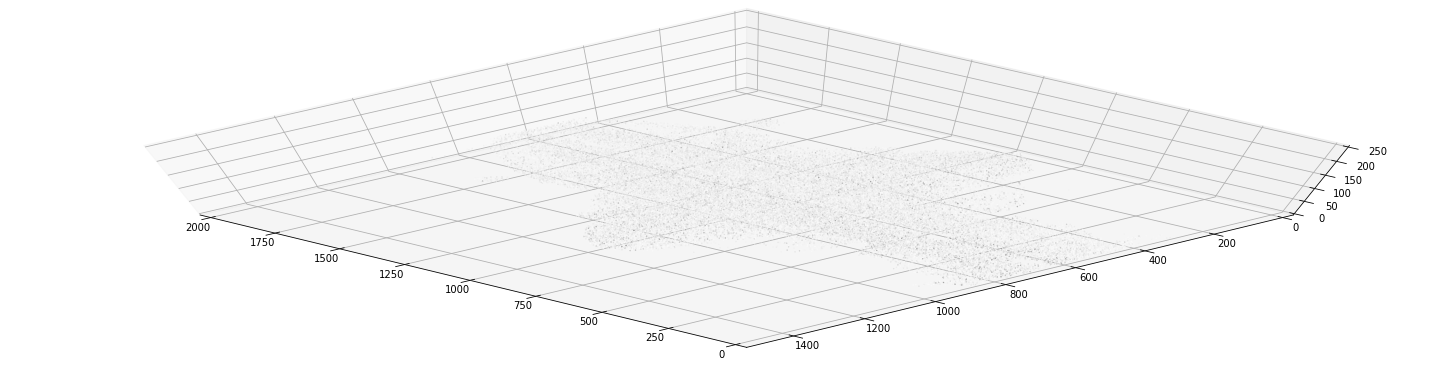

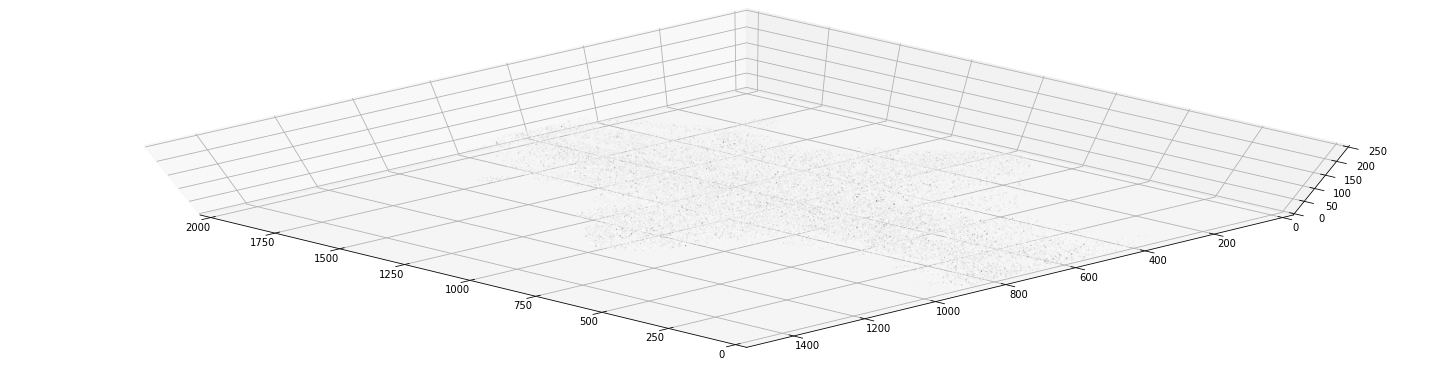

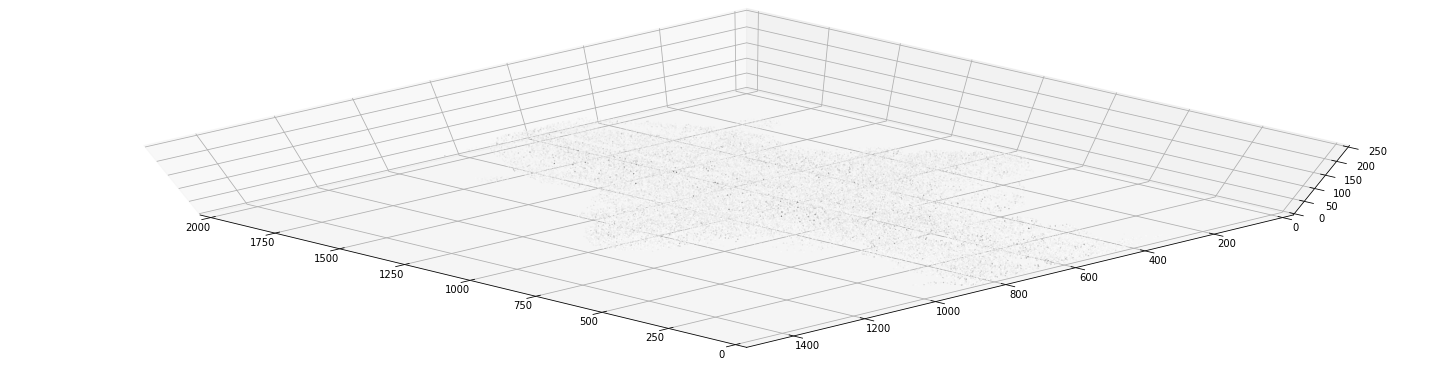

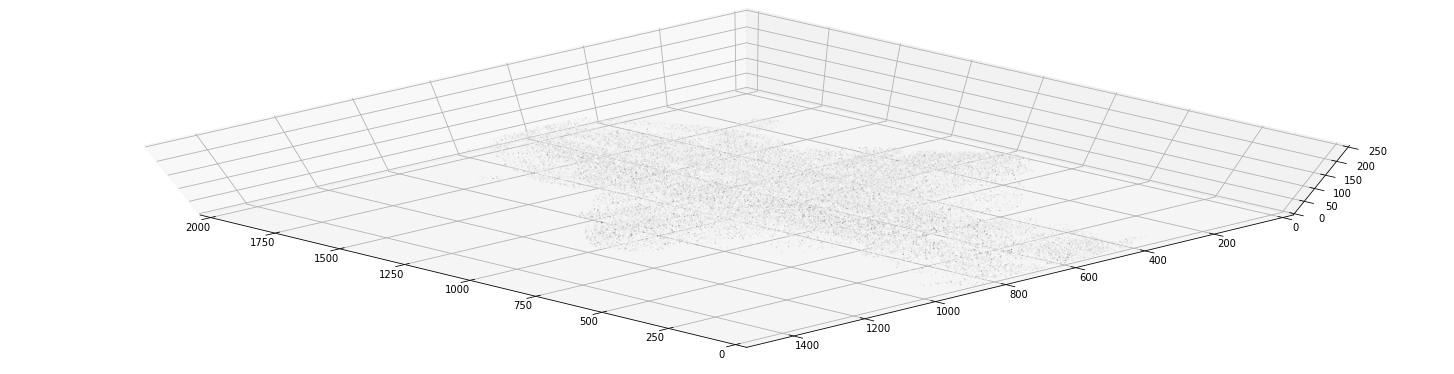

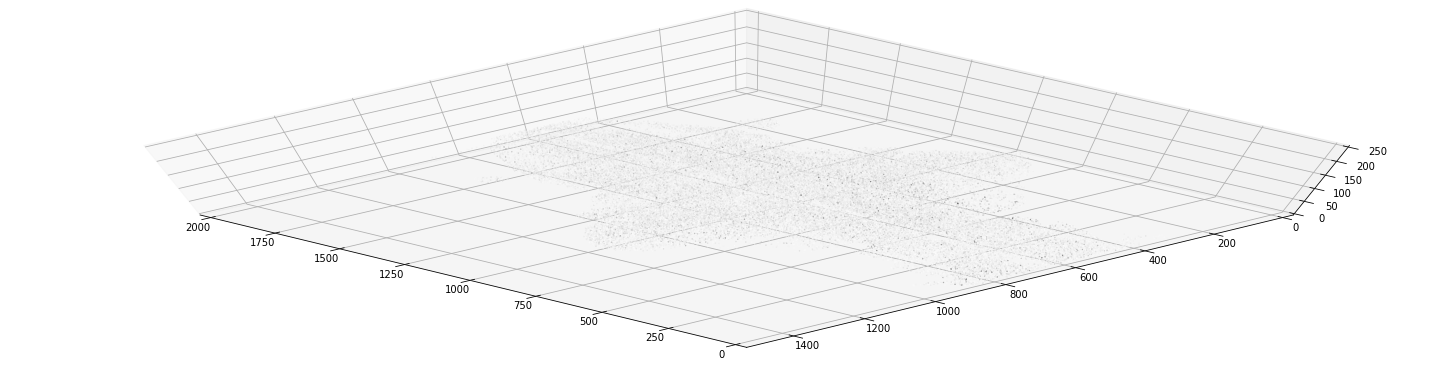

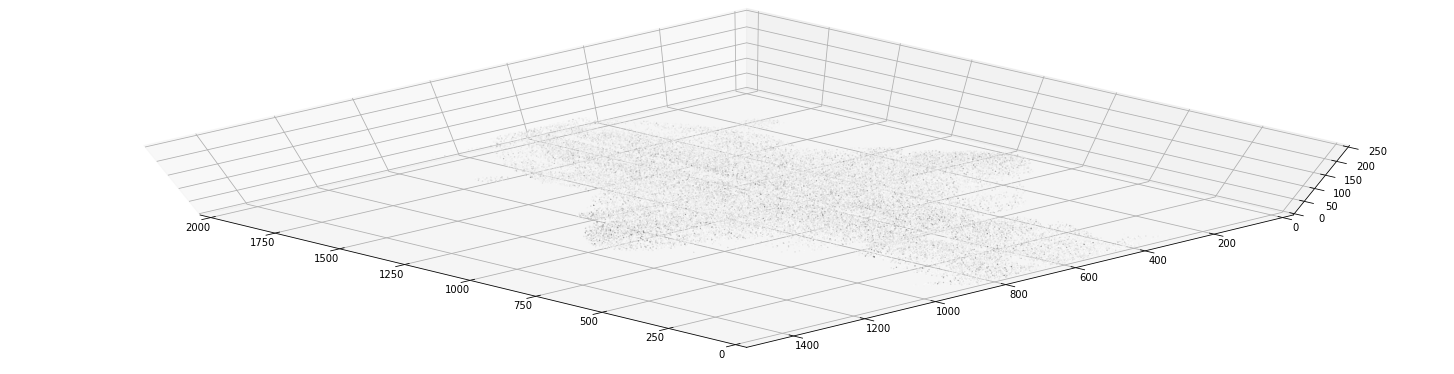

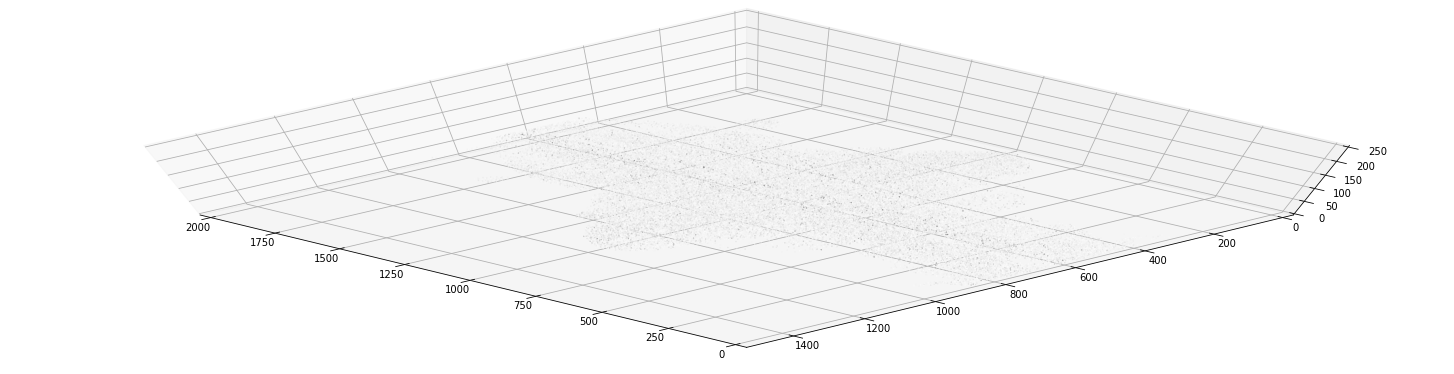

In [8]:
xyz_plot = xyz[:pca_model.n_features_]
for component in pca_model.components_:
    scatter3d(xyz_plot[:,0], xyz_plot[:,1], xyz_plot[:,2], np.abs(component))

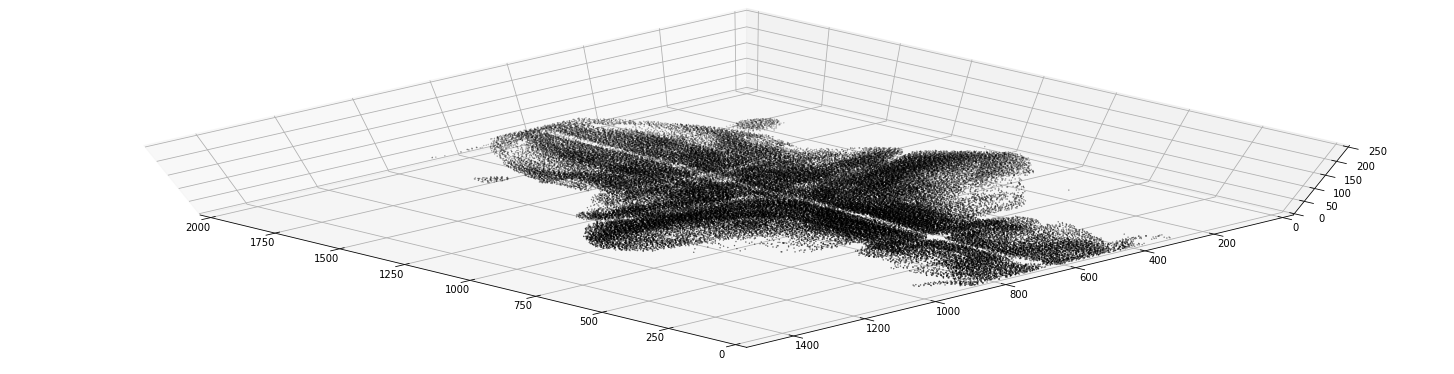

In [9]:
scatter3d(xyz_plot[:,0], xyz_plot[:,1], xyz_plot[:,2])

In [10]:
pca_model.components_[0]

array([-6.98134857e-05, -5.26470687e-05,  1.86062913e-04, ...,
       -4.13037223e-04, -2.64412229e-04, -4.75151717e-04])

In [11]:
pca_model.explained_variance_[0]

5538.563543967374